Install fastbook and Pytorch.


In [ ]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 727kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 50.1MB/s 
     |████████████████████████████████| 204kB 62.1MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 


Import fastbook, files for colab, Image for our photos, and HTML to show a website.

In [ ]:
from fastbook import *
from google.colab import files
from IPython.display import Image
from IPython.display import HTML

Imports 48 menus of Thai food (Each menu has 300+ images) from Github and sets path.

In [ ]:
!npx degit github:GemmyTheGeek/ThaiFoodDB#master FoodyDudy
path = Path('FoodyDudy/images')

npx: installed 1 in 0.868s
! destination directory is not empty, aborting. Use --force to override


In [ ]:
path = Path('FoodyDudy/images')

We have used path to check if all our images are in the files.

In [ ]:
path

Path('FoodyDudy/images')

In [ ]:
path.ls()

(#3) [Path('FoodyDudy/images/train'),Path('FoodyDudy/images/valid'),Path('FoodyDudy/images/test')]

In [ ]:
(path/"train").ls()

(#48) [Path('FoodyDudy/images/train/37'),Path('FoodyDudy/images/train/33'),Path('FoodyDudy/images/train/44'),Path('FoodyDudy/images/train/12'),Path('FoodyDudy/images/train/34'),Path('FoodyDudy/images/train/06'),Path('FoodyDudy/images/train/17'),Path('FoodyDudy/images/train/03'),Path('FoodyDudy/images/train/35'),Path('FoodyDudy/images/train/32')...]

In [ ]:
(path/"train/00").ls()

(#250) [Path('FoodyDudy/images/train/00/0122.jpg'),Path('FoodyDudy/images/train/00/0097.jpg'),Path('FoodyDudy/images/train/00/0297.jpg'),Path('FoodyDudy/images/train/00/0135.jpg'),Path('FoodyDudy/images/train/00/0099.jpg'),Path('FoodyDudy/images/train/00/0184.jpg'),Path('FoodyDudy/images/train/00/0287.jpg'),Path('FoodyDudy/images/train/00/0296.jpg'),Path('FoodyDudy/images/train/00/0221.jpg'),Path('FoodyDudy/images/train/00/0298.jpg')...]

GrandparentSpitter will seperate between the different sets and the X = image and Y = Menu name. We don't need to resize images because we already have images with 224 x 224 pixels. We also use augmentation because somepeople might take a photo of a dish and their photo is flipped. Then we set how many images are going to be in our batch.

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #x - image; y - single class
    get_items=get_image_files, #get image
    splitter=GrandparentSplitter(), #use parent folder as train-valid split
    get_y=parent_label, #use parent folder as label
    #two choices for resizing and rationale
    #squishing to prevent cropping places without chips/raisins
    # item_tfms=Resize(224, method=ResizeMethod.Squish), 
    # #cropping to preserve image quality; tried and doesn't work - peaked at 0.85 val acc
    # item_tfms=RandomResizedCrop(512),
    batch_tfms=aug_transforms(size=224, flip_vert=True), #standard fastai augmentation at size 512
    )
dls = dblock.dataloaders(path, bs=64) #batch size = 64

Show some part of our batch to check if our images have a problem or not.

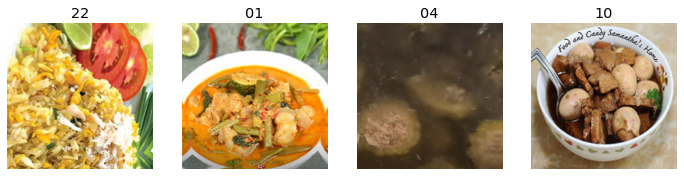

In [ ]:
dls.train.show_batch(max_n=4,nrows=1)

We are training our data set wiht "Architecture Resnet 34" and we are fine-tuning 10 times.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

Shows the confusion matrixs

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

Tells you the label of all of the menu (00 - 47) Total = 48menus

In [ ]:
Image('FoodyDudy/47thaifood.png')

In [ ]:
interp.plot_top_losses(100, nrows=10)

Exports model so that we can use later

In [ ]:
exportfilename='resnet34-10-v1.pkl'
learn.export(exportfilename)
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('resnet34-10-v1.pkl'),Path('resnet34-10-v1 (1).pkl')]

Downloads exported model to local computer

In [ ]:
files.download(exportfilename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Uploads our image file so we can predict it.

In [ ]:
uploaded = files.upload()

Saving Test2.jpg to Test2.jpg


Check if our image file uploaded yet.

In [ ]:
ls

 FoodyDudy/   README.md                 resnet34-10-v1.pkl   Test2.jpg
 LICENSE     'resnet34-10-v1 (1).pkl'   Test1.jpg


Show image to check if it is the correct image that we want to test.

In [ ]:
imagetotest='Test2.jpg'
Image(imagetotest)

Show all of the results.

In [ ]:
learn.predict(imagetotest)

('32',
 tensor(32),
 tensor([1.2871e-04, 1.5883e-06, 5.6222e-07, 3.9000e-05, 1.2012e-06, 3.1216e-07, 3.5099e-07, 7.0278e-05, 5.3185e-05, 1.1950e-04, 3.1871e-06, 1.8804e-07, 3.4527e-04, 3.6343e-07, 2.7077e-06, 2.7325e-06,
         1.0362e-07, 5.9588e-04, 1.6986e-05, 1.1667e-05, 1.9059e-04, 2.0313e-07, 3.3190e-02, 1.8095e-04, 2.9145e-05, 4.1793e-08, 2.8445e-03, 1.0858e-05, 2.7247e-05, 5.2031e-07, 1.7508e-03, 3.9199e-06,
         9.5921e-01, 2.2250e-06, 2.1366e-05, 4.1299e-05, 1.1075e-05, 2.3885e-06, 8.9375e-06, 6.8045e-07, 6.4657e-07, 7.6631e-04, 1.2847e-04, 1.5187e-06, 2.7571e-05, 1.1088e-04, 2.7284e-05, 1.1526e-05]))

Makes it easier to find what result we are looking for.

In [ ]:
learn.predict(imagetotest)
result=learn.predict(imagetotest)
predictcat=int(result[0])
predictindex=int(result[1])
predictpct=result[2][predictindex]
predictcat
"Cat=" + str(predictcat) + " : %=" + str(float(predictpct)*100)

'Cat=32 : %=95.92147469520569'

Uploads our model into our model.

In [ ]:
uploaded = files.upload()
path.ls(file_exts='.pkl')

KeyboardInterrupt: ignored

Load our model to learn_inf.

In [ ]:
learn_inf = load_learner('resnet34-10-v1.pkl')

In [ ]:
learn_inf.predict('Test1.jpg')

In [ ]:
youtubeid='QWa3indn_84'
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/' + youtubeid + '" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')